In [1]:
import pandas as pd
import numpy as np

In [2]:
# load data
user_balance = pd.read_csv('./user_balance_table.csv', parse_dates=['report_date'])
user_balance

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,2014-08-05,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,2014-08-08,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,2014-08-11,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
3,1,2014-08-14,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
4,1,2014-08-17,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840416,28033,2014-08-25,550646,550585,61,0,0,0,0,0,0,0,0,61,NaN,NaN,NaN,NaN
2840417,28033,2014-08-31,525707,538147,60,0,0,0,12500,12500,0,0,0,60,0.0,0.0,0.0,12500.0
2840418,28033,2014-07-24,20487121,20484824,2297,0,0,0,0,0,0,0,0,2297,NaN,NaN,NaN,NaN
2840419,28033,2014-07-27,20462288,20491722,2298,0,0,0,31732,0,31732,0,31732,2298,NaN,NaN,NaN,NaN


In [3]:
user_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840421 entries, 0 to 2840420
Data columns (total 18 columns):
 #   Column               Dtype         
---  ------               -----         
 0   user_id              int64         
 1   report_date          datetime64[ns]
 2   tBalance             int64         
 3   yBalance             int64         
 4   total_purchase_amt   int64         
 5   direct_purchase_amt  int64         
 6   purchase_bal_amt     int64         
 7   purchase_bank_amt    int64         
 8   total_redeem_amt     int64         
 9   consume_amt          int64         
 10  transfer_amt         int64         
 11  tftobal_amt          int64         
 12  tftocard_amt         int64         
 13  share_amt            int64         
 14  category1            float64       
 15  category2            float64       
 16  category3            float64       
 17  category4            float64       
dtypes: datetime64[ns](1), float64(4), int64(13)
memory usage: 390.

In [4]:
total_balance = user_balance.groupby(['report_date'])['total_purchase_amt', 'total_redeem_amt'].sum()
total_balance 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,total_purchase_amt,total_redeem_amt
report_date,,
2013-07-01,32488348,5525022
2013-07-02,29037390,2554548
2013-07-03,27270770,5953867
2013-07-04,18321185,6410729
2013-07-05,11648749,2763587
...,...,...
2014-08-27,302194801,468164147
2014-08-28,245082751,297893861
2014-08-29,267554713,273756380


In [5]:
purchase = total_balance[['total_purchase_amt']]
redeem = total_balance[['total_redeem_amt']]

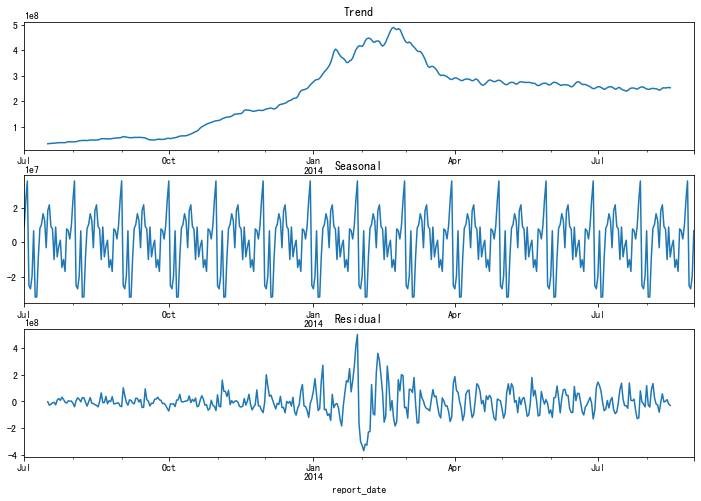

In [6]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# 对指定区间范围内的数据，进行可视化
def plot_stl(data):
    # STL返回三个部分：trend，seasonal, residual
    result = sm.tsa.seasonal_decompose(data, period=30)
    
    # 可视化
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    
    result.trend.plot(ax=ax1, title='Trend')
    result.seasonal.plot(ax=ax2, title='Seasonal')
    result.resid.plot(ax=ax3, title='Residual')
    
plot_stl(purchase.total_purchase_amt)

In [7]:

purchase['ds'] = purchase.index
purchase.rename(columns={'total_purchase_amt': 'y'}, inplace=True)
purchase = purchase.reset_index(drop=True)

redeem['ds'] = redeem.index
redeem.rename(columns={'total_redeem_amt': 'y'}, inplace=True)
redeem = redeem.reset_index(drop=True)


In [8]:
from fbprophet import Prophet

# 拟合Prophet模型
model = Prophet(weekly_seasonality=True, seasonality_prior_scale=0.1, n_changepoints=300)
model.fit(purchase)
# 预测未来1个月，9月份
future = model.make_future_dataframe(periods=30)
purchase_pred = model.predict(future)
purchase_pred

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-07-01,6.659731e+06,-6.029384e+07,1.624695e+08,6.659731e+06,6.659731e+06,4.477745e+07,4.477745e+07,4.477745e+07,4.477745e+07,4.477745e+07,4.477745e+07,0.0,0.0,0.0,5.143718e+07
1,2013-07-02,7.449143e+06,-5.038854e+07,1.712966e+08,7.449143e+06,7.449143e+06,4.753561e+07,4.753561e+07,4.753561e+07,4.753561e+07,4.753561e+07,4.753561e+07,0.0,0.0,0.0,5.498475e+07
2,2013-07-03,8.238556e+06,-6.560816e+07,1.603936e+08,8.238556e+06,8.238556e+06,3.765459e+07,3.765459e+07,3.765459e+07,3.765459e+07,3.765459e+07,3.765459e+07,0.0,0.0,0.0,4.589314e+07
3,2013-07-04,9.027968e+06,-8.760964e+07,1.485160e+08,9.027968e+06,9.027968e+06,1.949534e+07,1.949534e+07,1.949534e+07,1.949534e+07,1.949534e+07,1.949534e+07,0.0,0.0,0.0,2.852330e+07
4,2013-07-05,9.817381e+06,-1.272864e+08,1.082918e+08,9.817381e+06,9.817381e+06,-1.786047e+07,-1.786047e+07,-1.786047e+07,-1.786047e+07,-1.786047e+07,-1.786047e+07,0.0,0.0,0.0,-8.043092e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2014-09-26,1.996987e+08,6.272900e+07,3.010498e+08,1.979645e+08,2.014063e+08,-1.786047e+07,-1.786047e+07,-1.786047e+07,-1.786047e+07,-1.786047e+07,-1.786047e+07,0.0,0.0,0.0,1.818382e+08
453,2014-09-27,1.989459e+08,2.024551e+07,2.395369e+08,1.971228e+08,2.007320e+08,-6.945456e+07,-6.945456e+07,-6.945456e+07,-6.945456e+07,-6.945456e+07,-6.945456e+07,0.0,0.0,0.0,1.294913e+08
454,2014-09-28,1.981931e+08,1.670344e+07,2.552742e+08,1.962705e+08,2.000770e+08,-6.214795e+07,-6.214795e+07,-6.214795e+07,-6.214795e+07,-6.214795e+07,-6.214795e+07,0.0,0.0,0.0,1.360452e+08
455,2014-09-29,1.974403e+08,1.157480e+08,3.568170e+08,1.954422e+08,1.994407e+08,4.477745e+07,4.477745e+07,4.477745e+07,4.477745e+07,4.477745e+07,4.477745e+07,0.0,0.0,0.0,2.422178e+08


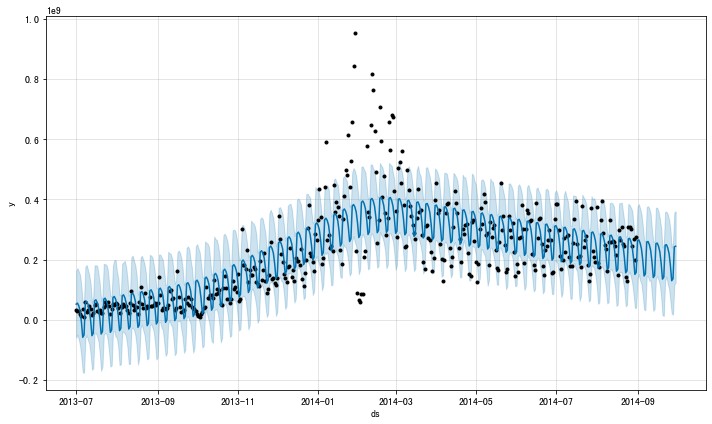

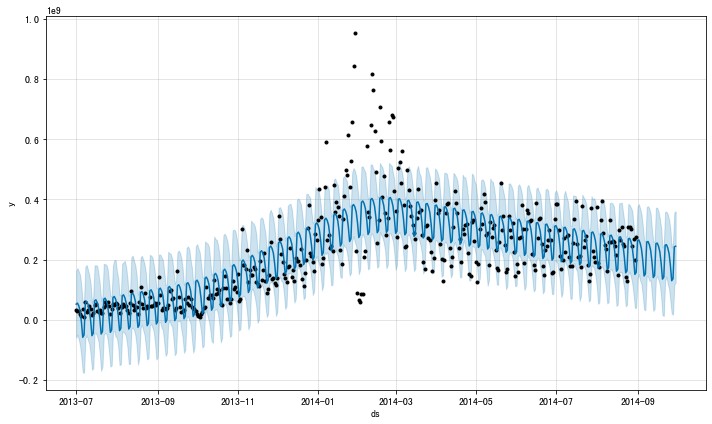

In [9]:
model.plot(purchase_pred)

In [10]:
# 拟合Prophet模型
model_2 = Prophet(weekly_seasonality=True, seasonality_prior_scale=0.1, n_changepoints=300)
model_2.fit(redeem)
# 预测未来1个月，9月份
future = model_2.make_future_dataframe(periods=30)
redeem_pred = model_2.predict(future)

redeem_pred

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-07-01,-1.556521e+07,-4.795967e+07,1.168734e+08,-1.556521e+07,-1.556521e+07,4.895767e+07,4.895767e+07,4.895767e+07,4.895767e+07,4.895767e+07,4.895767e+07,0.0,0.0,0.0,3.339246e+07
1,2013-07-02,-1.482612e+07,-8.515818e+07,9.543329e+07,-1.482612e+07,-1.482612e+07,2.273017e+07,2.273017e+07,2.273017e+07,2.273017e+07,2.273017e+07,2.273017e+07,0.0,0.0,0.0,7.904048e+06
2,2013-07-03,-1.408704e+07,-7.416797e+07,9.593562e+07,-1.408704e+07,-1.408704e+07,2.487539e+07,2.487539e+07,2.487539e+07,2.487539e+07,2.487539e+07,2.487539e+07,0.0,0.0,0.0,1.078836e+07
3,2013-07-04,-1.334795e+07,-9.199306e+07,7.627623e+07,-1.334795e+07,-1.334795e+07,6.121558e+06,6.121558e+06,6.121558e+06,6.121558e+06,6.121558e+06,6.121558e+06,0.0,0.0,0.0,-7.226390e+06
4,2013-07-05,-1.260886e+07,-1.034889e+08,6.830414e+07,-1.260886e+07,-1.260886e+07,-4.512272e+06,-4.512272e+06,-4.512272e+06,-4.512272e+06,-4.512272e+06,-4.512272e+06,0.0,0.0,0.0,-1.712113e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2014-09-26,2.903652e+08,2.040402e+08,3.700584e+08,2.897084e+08,2.910154e+08,-4.512272e+06,-4.512272e+06,-4.512272e+06,-4.512272e+06,-4.512272e+06,-4.512272e+06,0.0,0.0,0.0,2.858529e+08
453,2014-09-27,2.905247e+08,1.479062e+08,3.144081e+08,2.898238e+08,2.912054e+08,-5.844884e+07,-5.844884e+07,-5.844884e+07,-5.844884e+07,-5.844884e+07,-5.844884e+07,0.0,0.0,0.0,2.320758e+08
454,2014-09-28,2.906842e+08,1.740464e+08,3.416124e+08,2.899313e+08,2.913938e+08,-3.972369e+07,-3.972369e+07,-3.972369e+07,-3.972369e+07,-3.972369e+07,-3.972369e+07,0.0,0.0,0.0,2.509605e+08
455,2014-09-29,2.908437e+08,2.519389e+08,4.262396e+08,2.900460e+08,2.915910e+08,4.895767e+07,4.895767e+07,4.895767e+07,4.895767e+07,4.895767e+07,4.895767e+07,0.0,0.0,0.0,3.398013e+08


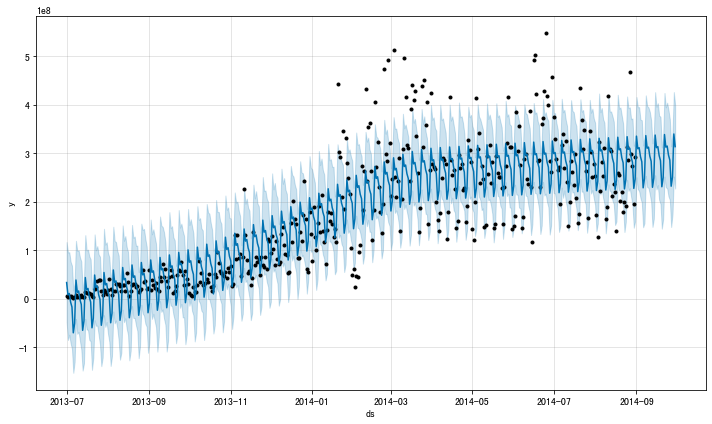

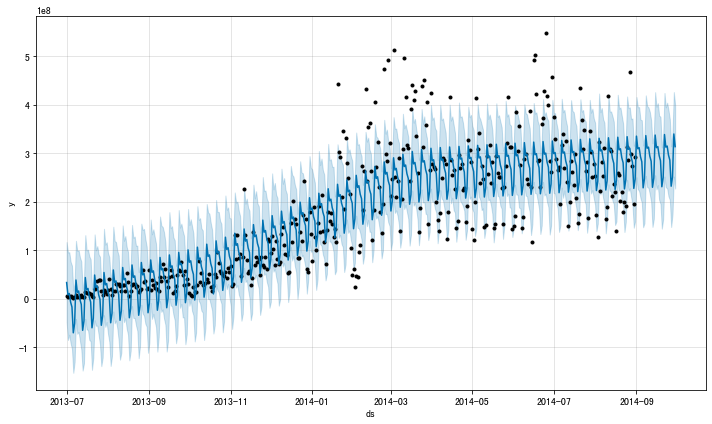

In [11]:
model_2.plot(redeem_pred)

In [16]:
purchase_2 = purchase_pred[(purchase_pred['ds'] >= '2014-09-01') & (purchase_pred['ds'] <= '2014-09-30')][['ds', 'yhat']]
purchase_2

,ds,yhat
427,2014-09-01,2.632957e+08
428,2014-09-02,2.653011e+08
429,2014-09-03,2.546673e+08
430,2014-09-04,2.357553e+08
431,2014-09-05,1.976467e+08
432,2014-09-06,1.452998e+08
433,2014-09-07,1.518536e+08
434,2014-09-08,2.580262e+08
435,2014-09-09,2.600316e+08
436,2014-09-10,2.493978e+08


In [17]:
redeem_2 = redeem_pred[(redeem_pred['ds'] >= '2014-09-01') & (redeem_pred['ds'] <= '2014-09-30')][['ds', 'yhat']]
redeem_2

,ds,yhat
427,2014-09-01,3.353353e+08
428,2014-09-02,3.092673e+08
429,2014-09-03,3.115720e+08
430,2014-09-04,2.929777e+08
431,2014-09-05,2.825034e+08
432,2014-09-06,2.287263e+08
433,2014-09-07,2.476110e+08
434,2014-09-08,3.364518e+08
435,2014-09-09,3.103838e+08
436,2014-09-10,3.126885e+08


In [18]:
# 合并结果
result = pd.DataFrame()
result['ds'] = purchase_2.ds
result['purchase_amt'] = purchase_2.yhat
result['redeem_amt'] = redeem_2.yhat

In [20]:
result['ds'] = result['ds'].apply(lambda x: str(x).replace('-', '')[:8])
result

,ds,purchase_amt,redeem_amt
427,20140901,2.632957e+08,3.353353e+08
428,20140902,2.653011e+08,3.092673e+08
429,20140903,2.546673e+08,3.115720e+08
430,20140904,2.357553e+08,2.929777e+08
431,20140905,1.976467e+08,2.825034e+08
432,20140906,1.452998e+08,2.287263e+08
433,20140907,1.518536e+08,2.476110e+08
434,20140908,2.580262e+08,3.364518e+08
435,20140909,2.600316e+08,3.103838e+08
436,20140910,2.493978e+08,3.126885e+08


In [21]:
result.to_csv('prophet.csv', header=None, index=False)